# Import the data

In [ ]:
import pandas as pd

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv"
#dateparser = lambda x: datetime.strptime(x, "%Y%m%dT%H%M%S")
df = pd.read_csv(link)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Explore Data Analyse

In [ ]:
# Info
# Describe
# Duplicate

# Fill nan (at least 10%)
# Drop or not duplicate / Nan value

# Merge or join (make sure we have enough data)

# Correlation (heatmap)
# pairplot

# Drop useless cols

# update columns ex dealing categorical columns ( factorisarion and dummies )
# https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
# Pivot table / Group by as example
# explode

# Classification

In [ ]:
# Joao -> create a system loop to test the algorithms

# Logistic regression -> François
# Logistic regression + standard deviation ? -> François
# SVM -> Joao
# Decision tree
# KNNeighbours
# pipeline -> joana -> for KNN & decision tree 
# pipeline -> Fabien -> for SVM

# Grid search ?
# Confusion matrix ?
# Cross validation ?

We can keep grid search but mandatory for decision tree

Joao works first on the algorithm then add the other works

# NLP

In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from ast import literal_eval
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# library to import text inb html
from urllib import request
from bs4 import BeautifulSoup

# Read the HTML from the URL
url = "https://en.wikipedia.org/wiki/Deep-water_soloing"
html = request.urlopen(url).read()

#regex = r"[>](.*?)[<\/]"

# Get text (clean html) using BeautifulSoup get_text method
sentences = BeautifulSoup(html).get_text()
#print(sentence)
# Tokenize or get words
tokens = nltk.word_tokenize(sentences)
df = pd.DataFrame(tokens, columns=["words"])
df.head()

,words
0,Deep-water
1,soloing
2,-
3,Wikipedia
4,Deep-water


In [ ]:
# Function to change string array 
get_tokens_list = lambda x: literal_eval(x) if type(x) == str else x

In [7]:
# this list allow us to set which columns to upload
col_list = ['words']

In [11]:
nltk.download('popular')
stop_words = nltk.corpus.stopwords.words("english") + ['"', "'", "'s", "-", "_",",","--",".", "of", "the"]

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package movie_reviews is already

In [14]:
df_nlp = df[col_list].copy()
df_nlp.fillna(" ", inplace=True)

In [16]:
# Get freq words from critics consensus
df_nlp["X"] = df_nlp["words"].apply(lambda sentence: [w.lower() for w in nltk.word_tokenize(sentence)])
freq = nltk.FreqDist(df_nlp["X"].sum())
# Data Frame word list
df_tokens = pd.DataFrame.from_dict(freq, orient='index')
df_tokens.columns = ['Frequency']
df_tokens.index.name = 'Term'

In [17]:
# Get freq clean words from critics consensus
df_nlp["X_clean"] = df_nlp["X"].apply(lambda tokens: [ w for w in tokens if w.lower() not in stop_words ])
freq_clean = nltk.FreqDist(df_nlp["X_clean"].sum())
# Data Frame clean word list
df_words = pd.DataFrame.from_dict(freq_clean, orient='index')
df_words.columns = ['Frequency']
df_words.index.name = 'Term'

In [19]:
porter = PorterStemmer()
df_nlp["X_stem"] = df_nlp["X_clean"].apply(lambda words: [porter.stem(word.lower()) for word in words] )
# change to dataFrame to see better final results
df_stem = pd.DataFrame.from_dict(nltk.FreqDist(df_nlp["X_stem"].sum()), orient='index')
df_stem.columns = ['Frequency']
df_stem.index.name = 'Term'

In [21]:
wnl = WordNetLemmatizer()
df_nlp["X_lem"] = df_nlp["X_clean"].apply(lambda words: [wnl.lemmatize(word.lower()) for word in words] )
df_lem = pd.DataFrame.from_dict(nltk.FreqDist(df_nlp["X_lem"].sum()), orient='index')
df_lem.columns = ['Frequency']
df_lem.index.name = 'Term'

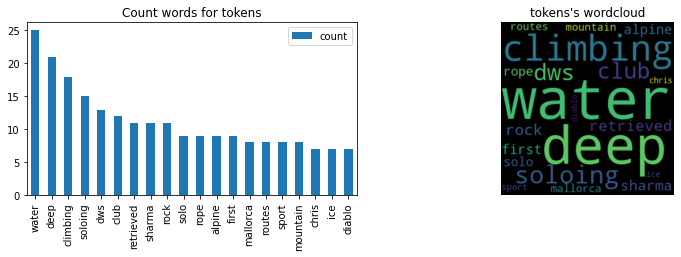

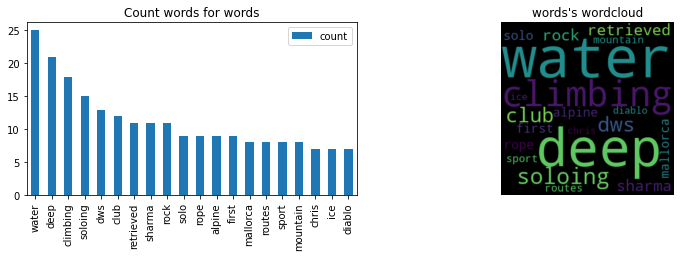

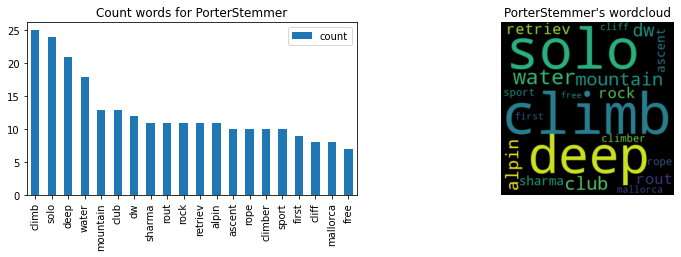

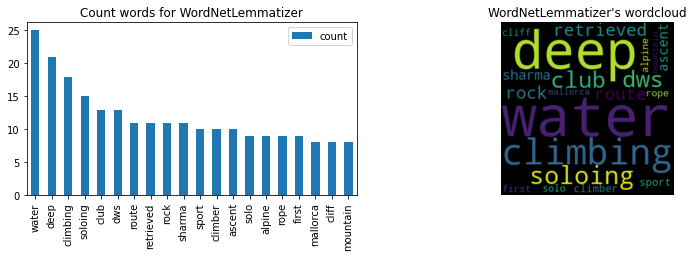

In [39]:
list_freq = [
    {"X": df_nlp["X"], "title": "tokens"},
    {"X": df_nlp["X_clean"], "title": "words"},
    {"X": df_nlp["X_stem"], "title": "PorterStemmer"},
    {"X": df_nlp["X_lem"], "title": "WordNetLemmatizer"}    
]

# Create a matrix with vectorise of any alpha word longer than 2 caracters
def get_count(X, name = "", max_features=20, stop_words=stop_words):
    vectorizer = CountVectorizer(max_features=max_features, stop_words=stop_words )
    text_matrix = vectorizer.fit_transform(X.apply(lambda wlist: " ".join(wlist)))
    df_matrix_neg = pd.DataFrame(text_matrix.toarray(), columns = vectorizer.get_feature_names_out())
    df_sum_matrix_neg = pd.DataFrame(df_matrix_neg.sum().sort_values(ascending=False), columns = ["count"])
    
    fig = plt.subplots(figsize=(13,7))
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax1.set(title=f"Count words for {name}")
    df_sum_matrix_neg.plot(kind="bar", ax = ax1)
    #initial text
    wordcloud_neg = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
    wordcloud_neg.generate_from_frequencies(df_matrix_neg.sum())
    ax2.imshow(wordcloud_neg, interpolation="bilinear")
    ax2.axis('off')
    ax2.set(title=f"{name}'s wordcloud")
    plt.margins(x=0, y=0)

for freq in list_freq:
    get_count(freq["X"], name = freq["title"])

# Linear regression


In [ ]:
# François

# Unsupervise algorithm

## KNearest Neighbours

## Clustering

## PCA

In [ ]:
# Fabien